# Linear Regression Exercise

## Imorting the libraries

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## Seting parameters

In [22]:
rng = np.random
learning_rate = 0.01
training_epochs = 1000
display_step = 50

## Generating training data

In [23]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                      7.042,10.791,5.313,7.997,5.654,9.27,3.1]) 
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                      2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
print(n_samples)

17


## tf graph input

In [24]:
X = tf.placeholder("float")
Y = tf.placeholder("float")


## Seting model weight

In [25]:
W = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name = "bias")

## Construct a linear model

In [26]:
pred = tf.add(tf.multiply(X, W), b)

## Mean squared error

In [27]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

## Gradient dencent

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Initialize the variables

In [29]:
init = tf.global_variables_initializer()

## Start training

Epoch: 0050 cost= 0.140726626 W= 0.10883821 b= 1.8140507
Epoch: 0100 cost= 0.133382589 W= 0.117209464 b= 1.7538286
Epoch: 0150 cost= 0.126885414 W= 0.12508285 b= 1.6971877
Epoch: 0200 cost= 0.121137254 W= 0.13248827 b= 1.6439139
Epoch: 0250 cost= 0.116051927 W= 0.13945313 b= 1.5938091
Epoch: 0300 cost= 0.111552998 W= 0.1460037 b= 1.5466849
Epoch: 0350 cost= 0.107572883 W= 0.15216443 b= 1.5023648
Epoch: 0400 cost= 0.104051590 W= 0.15795879 b= 1.4606805
Epoch: 0450 cost= 0.100936145 W= 0.16340865 b= 1.4214747
Epoch: 0500 cost= 0.098179817 W= 0.16853434 b= 1.3846008
Epoch: 0550 cost= 0.095741063 W= 0.1733554 b= 1.3499185
Epoch: 0600 cost= 0.093583360 W= 0.17788976 b= 1.3172985
Epoch: 0650 cost= 0.091674313 W= 0.18215448 b= 1.2866186
Epoch: 0700 cost= 0.089985132 W= 0.18616574 b= 1.2577618
Epoch: 0750 cost= 0.088490613 W= 0.18993835 b= 1.2306218
Epoch: 0800 cost= 0.087168463 W= 0.19348611 b= 1.2050999
Epoch: 0850 cost= 0.085998617 W= 0.19682284 b= 1.181096
Epoch: 0900 cost= 0.084963448 W= 

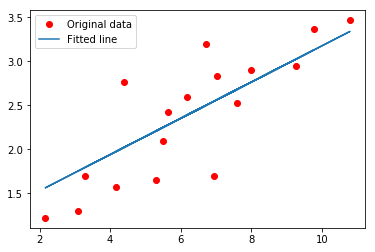

In [35]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X: x, Y: y})
            
            #Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict = {X: train_X, Y:trian_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", sess.run(W), "b=", sess.run(b))
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()